In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import axes3d
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

%matplotlib inline


# Operazioni su DataFrame

In [2]:
df_totale = pd.read_excel('dati_puliti_finali.xlsx')

In [3]:
df_totale.drop(columns=('Unnamed: 0'),inplace=True)


In [4]:
df_totale

record_id  target  indicaz_terap_renal___1  indicaz_terap_renal___2  \
0           4       2                        0                        0   
1           5       2                        0                        0   
2           6       2                        0                        0   
3           7       2                        0                        0   
4           8       2                        0                        0   
..        ...     ...                      ...                      ...   
282     558-5       1                        0                        0   
283     558-8       3                        1                        1   
284     558-9       1                        1                        1   
285    558-10       3                        0                        1   
286    558-12       3                        1                        1   

     indicaz_terap_renal___3  indicaz_terap_renal___4  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   
..                       ...                      ...   
282                        0                        1   
283                        1                        1   
284                        1                        1   
285                        1                        1   
286                        1                        0   

     indicaz_terap_renal___5  indicaz_terap_renal___6  lac_mmol  occhi_gcs  \
0                          0                        0    0.6000          3   
1                          0                        0    2.0000          2   
2                          0                        0    2.5000          3   
3                          0                        0    2.0000          2   
4                          0                        0    1.0000          2   
..                       ...                      ...       ...        ...   
282                        0                        1    0.0000          4   
283                        0                        0   12.5000          1   
284                        0                        0    0.0000          4   
285                        0                        0    4.2000          1   
286                        0                        0    0.7326          1   

     ...  downtime_perc  dose_totale  ultrafiltr_totale  rac_cam_out  \
0    ...            0.0          0.0                0.0            0   
1    ...            0.0          0.0                0.0            0   
2    ...            0.0          0.0                0.0            0   
3    ...            0.0          0.0                0.0            0   
4    ...            0.0          0.0                0.0            0   
..   ...            ...          ...                ...          ...   
282  ...            0.0          0.0                0.0            0   
283  ...            0.0          0.0                0.0            0   
284  ...            0.0          0.0                0.0            0   
285  ...            0.0          0.0                0.0            0   
286  ...            0.0          0.0                0.0            0   

     tip_camp_out___1  tip_camp_out___2  tip_camp_out___3  tip_camp_out___4  \
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                 0                 0                 0   
..                ...               ...               ...               ...   
282                 0                 0                 0      

In [5]:
personal_id = df_totale['record_id']

In [6]:
df_totale.drop(columns=('record_id'),inplace=True)

In [7]:
df_score = df_totale[['sofa_score','ap2_total_score','saps_totale','sofa_score_foll_12h','sofa_score_foll_24h','sofa_score_foll_2gg','sofa_score_foll_3gg']]

In [8]:
df_outcome = df_totale.loc[:,'esito_ti':]

In [9]:
df_score

sofa_score  ap2_total_score  saps_totale  sofa_score_foll_12h  \
0            11               17           41                   10   
1             6               20           34                    5   
2             5               13           31                    5   
3             7               17           45                    6   
4            11               23           56                   10   
..          ...              ...          ...                  ...   
282           4               21           55                    4   
283          18               38           96                    0   
284          12               39           79                    7   
285          14               22           56                   13   
286          15               21           88                   15   

     sofa_score_foll_24h  sofa_score_foll_2gg  sofa_score_foll_3gg  
0                      8                    7                   10  
1                     11                   10                   10  
2                      6                    4                    4  
3                     10                    9                   11  
4                      9                    9                    9  
..                   ...                  ...                  ...  
282                    3                    4                    4  
283                    0                    0                    0  
284                   10                    5                    2  
285                   12                   11                   11  
286                   14                   16                    0  

[287 rows x 7 columns]

In [10]:
df_no_outcome = df_totale.copy()

In [11]:
df_no_outcome = df_totale.drop(columns=df_outcome.columns)

In [12]:
df_outcome.drop(columns=('outcome_ti_complete'), inplace=True)

In [13]:
df_noscore = df_no_outcome.copy()

In [14]:
df_noscore.drop(columns=df_score.columns, inplace=True)

# Caso 1

Valuto il PCA esclusi gli outcome, che verranno poi presi in considerazione per come si distribuiscono rispetto i pca

#### Preparo Dataset separati per 1gg, 2gg e 3gg per il caso senza outcome

In [15]:
#1 GIORNO
df_1gg = df_no_outcome.loc[:,:'diff_sofa_score_foll_24h']

In [16]:
#2 GIORNI 
df_2gg = df_no_outcome.loc[:,:'diff_sofa_score_foll_2gg']

In [17]:
df_3gg = df_no_outcome.copy()

##  PCA (Standard Scaler) NON DA USARE

#### Prova: 1 Giorno


In [18]:
scaler = StandardScaler()
scaler.fit(df_1gg)
df_1gg_scaled = pd.DataFrame(scaler.transform(df_1gg),columns=df_1gg.columns)

In [19]:
pca = PCA(n_components=2).fit(df_1gg_scaled)

In [20]:
df_1gg_pca = pd.DataFrame(pca.transform(df_1gg_scaled))


In [21]:
pca1 = PCA(n_components=3).fit(df_1gg_scaled)

In [22]:
df_1gg_pca_1 = pd.DataFrame(pca1.transform(df_1gg_scaled))


#### Prova: 2 Giorni

In [23]:
scaler.fit(df_2gg)
df_2gg_st_scaler = pd.DataFrame(scaler.transform(df_2gg),columns=df_2gg.columns)

In [24]:
pca2 = PCA(n_components=2).fit(df_2gg_st_scaler)

In [25]:
df_2gg_pca_ss = pd.DataFrame(pca2.transform(df_2gg_st_scaler))


In [26]:
pca3 = PCA(n_components=3).fit(df_2gg_st_scaler)

In [27]:
df_2gg_pca1_ss = pd.DataFrame(pca3.transform(df_2gg_st_scaler))


#### Prova:3 Giorni

In [28]:
scaler.fit(df_3gg)
df_3gg_st_scaler = pd.DataFrame(scaler.transform(df_3gg),columns=df_3gg.columns)

In [29]:
pca4 = PCA(n_components=2).fit(df_3gg_st_scaler)

In [30]:
df_3gg_pca1_ss = pd.DataFrame(pca4.transform(df_3gg_st_scaler))


**confronto risultati delle componenti = 2 dei tre casi**


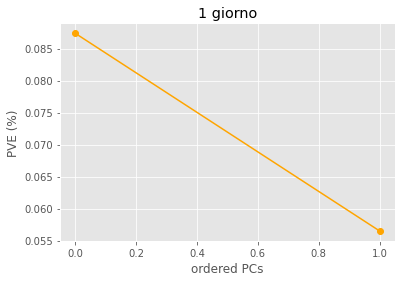

[0.08740811 0.0565058 ]
0.14391390697216133


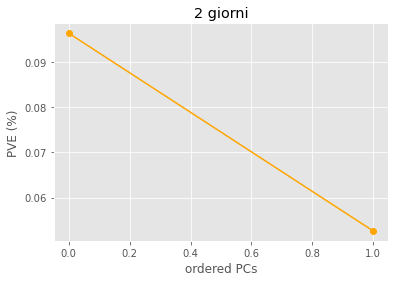

[0.09631196 0.05263223]
0.148944190269553


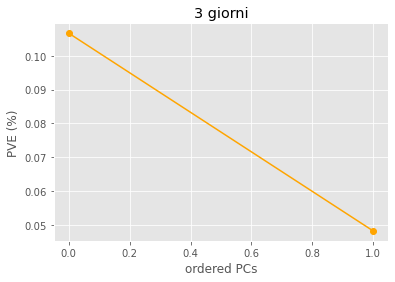

[0.10670701 0.04815319]
0.15486020259451136


In [31]:
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_ratio_, marker='o', color='orange')
plt.title('1 giorno')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_[:]))

plt.style.use("ggplot") 
plt.plot(pca2.explained_variance_ratio_, marker='o', color='orange')
plt.title('2 giorni')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca2.explained_variance_ratio_)
print(np.sum(pca2.explained_variance_ratio_[:]))


plt.style.use("ggplot") 
plt.plot(pca4.explained_variance_ratio_, marker='o', color='orange')
plt.title('3 giorni')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca4.explained_variance_ratio_)
print(np.sum(pca4.explained_variance_ratio_[:]))

In [32]:
pca5 = PCA(n_components=3).fit(df_3gg_st_scaler)

In [33]:
df_3gg_pca1_ss = pd.DataFrame(pca5.transform(df_3gg_st_scaler))


**confronto risultati delle componenti = 3 dei tre casi**


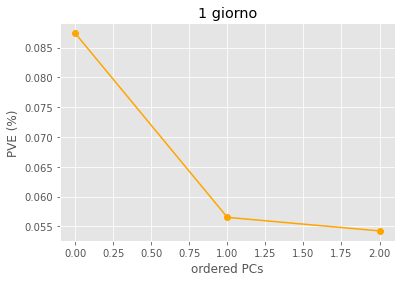

[0.08740811 0.0565058  0.05423083]
0.19814473253355194


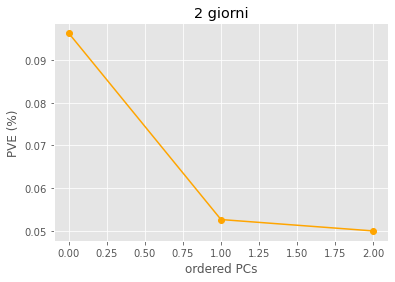

[0.09631196 0.05263223 0.04996626]
0.1989104510659844


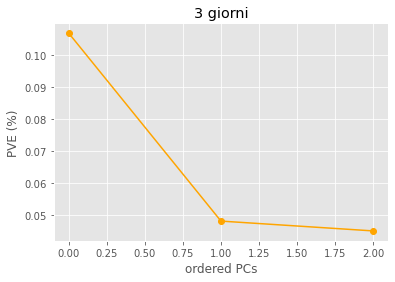

[0.10670701 0.04815319 0.04508907]
0.19994927732147655


In [34]:
plt.style.use("ggplot") 
plt.plot(pca1.explained_variance_ratio_, marker='o', color='orange')
plt.title('1 giorno')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca1.explained_variance_ratio_)
print(np.sum(pca1.explained_variance_ratio_[:]))

plt.style.use("ggplot") 
plt.plot(pca3.explained_variance_ratio_, marker='o', color='orange')
plt.title('2 giorni')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca3.explained_variance_ratio_)
print(np.sum(pca3.explained_variance_ratio_[:]))

plt.style.use("ggplot") 
plt.plot(pca5.explained_variance_ratio_, marker='o', color='orange')
plt.title('3 giorni')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca5.explained_variance_ratio_)
print(np.sum(pca5.explained_variance_ratio_[:]))

## PCA (Min Max Scaler) DA USARE

#### prova: 1 Giorno

In [35]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_1gg)
df_1gg_scaled_minmax = minmax_scaler.transform(df_1gg)

In [36]:
pca6= PCA(n_components=2).fit(df_1gg_scaled_minmax)

In [37]:
df_1gg_pca_minmax = pd.DataFrame(pca6.transform(df_1gg_scaled_minmax))


In [38]:
pca7= PCA(n_components=3).fit(df_1gg_scaled_minmax)

In [39]:
df_1gg_pca_1_minmax = pd.DataFrame(pca7.transform(df_1gg_scaled_minmax))


#### Prova: 2 Giorni

In [40]:
minmax_scaler.fit(df_2gg)
df_2gg_minmax_scal = minmax_scaler.transform(df_2gg)

In [41]:
pca8 = PCA(n_components=2).fit(df_2gg_minmax_scal)

In [42]:
df_2gg_pca_minmax = pd.DataFrame(pca8.transform(df_2gg_minmax_scal))

In [43]:
pca9 = PCA(n_components=3).fit(df_2gg_minmax_scal)

In [44]:
df_2gg_pca_1_minmax = pd.DataFrame(pca9.transform(df_2gg_minmax_scal))

#### Prova: 3 Giorni

In [45]:
minmax_scaler.fit(df_3gg)
df_3gg_minmax_scal = minmax_scaler.transform(df_3gg)

In [46]:
pca10 = PCA(n_components=2).fit(df_3gg_minmax_scal)

In [47]:
df_3gg_pca_minmax = pd.DataFrame(pca10.transform(df_3gg_minmax_scal))

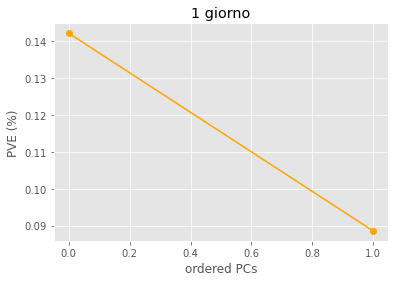

[0.14223895 0.08854991]
0.23078886459217302


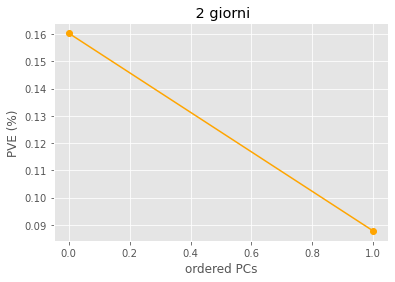

[0.16026184 0.08778669]
0.2480485229596922


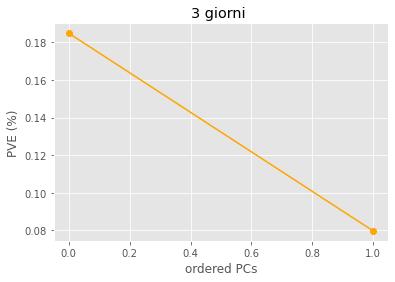

[0.18491218 0.07965044]
0.26456262389384855


In [48]:
plt.style.use("ggplot") 
plt.plot(pca6.explained_variance_ratio_, marker='o', color='orange')
plt.title('1 giorno')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca6.explained_variance_ratio_)
print(np.sum(pca6.explained_variance_ratio_))

plt.style.use("ggplot") 
plt.plot(pca8.explained_variance_ratio_, marker='o', color='orange')
plt.title(' 2 giorni')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca8.explained_variance_ratio_)
print(np.sum(pca8.explained_variance_ratio_))

plt.style.use("ggplot") 
plt.plot(pca10.explained_variance_ratio_, marker='o', color='orange')
plt.title('3 giorni ')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca10.explained_variance_ratio_)
print(np.sum(pca10.explained_variance_ratio_))

In [49]:
pca11=PCA(n_components=3).fit(df_3gg_minmax_scal)

In [50]:
df_3gg_pca_1_minmax = pd.DataFrame(pca11.transform(df_3gg_minmax_scal))

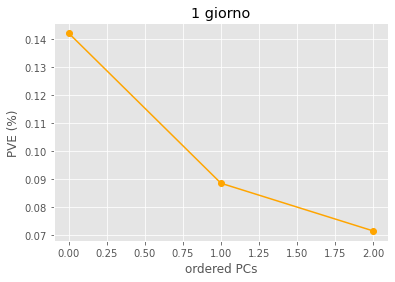

[0.14223895 0.08854991 0.07148831]
0.3022771707252703


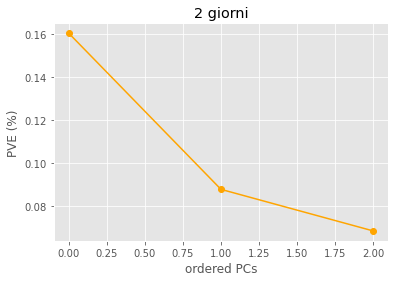

[0.16026184 0.08778669 0.06849083]
0.3165393571412496


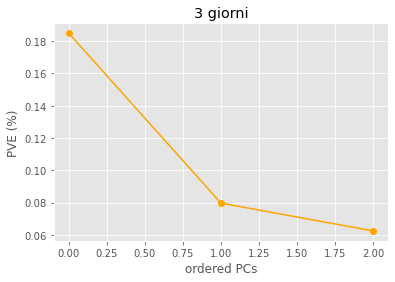

[0.18491218 0.07965044 0.06244027]
0.32700289781770264


In [51]:
plt.style.use("ggplot") 
plt.plot(pca7.explained_variance_ratio_, marker='o', color='orange')
plt.title('1 giorno')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca7.explained_variance_ratio_)
print(np.sum(pca7.explained_variance_ratio_))

plt.style.use("ggplot") 
plt.plot(pca9.explained_variance_ratio_, marker='o', color='orange')
plt.title('2 giorni')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca9.explained_variance_ratio_)
print(np.sum(pca9.explained_variance_ratio_))

plt.style.use("ggplot") 
plt.plot(pca11.explained_variance_ratio_, marker='o', color='orange')
plt.title('3 giorni')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
plt.show()
print(pca11.explained_variance_ratio_)
print(np.sum(pca11.explained_variance_ratio_))

consideriamo il caso migliore che è quello con il numero di 3 componenti e sul dataset completo, in ogni caso si può evidentemente notare come riducendoci anche solo a due componenti si riesce comunque a catturare una quantità di varianza interessante.

## Analizzo il PCA su 2 componenti

FARE ANALISI SULLE FEATURE RISPETTO AL PCA

In [52]:
df_outcome.insert(loc=1, column='deg_tot' , value=df_outcome['deg_tot_dim'] + df_outcome['deg_tot_dec'])  
df_outcome.drop(columns=['deg_tot_dim','deg_tot_dec'],inplace=True)

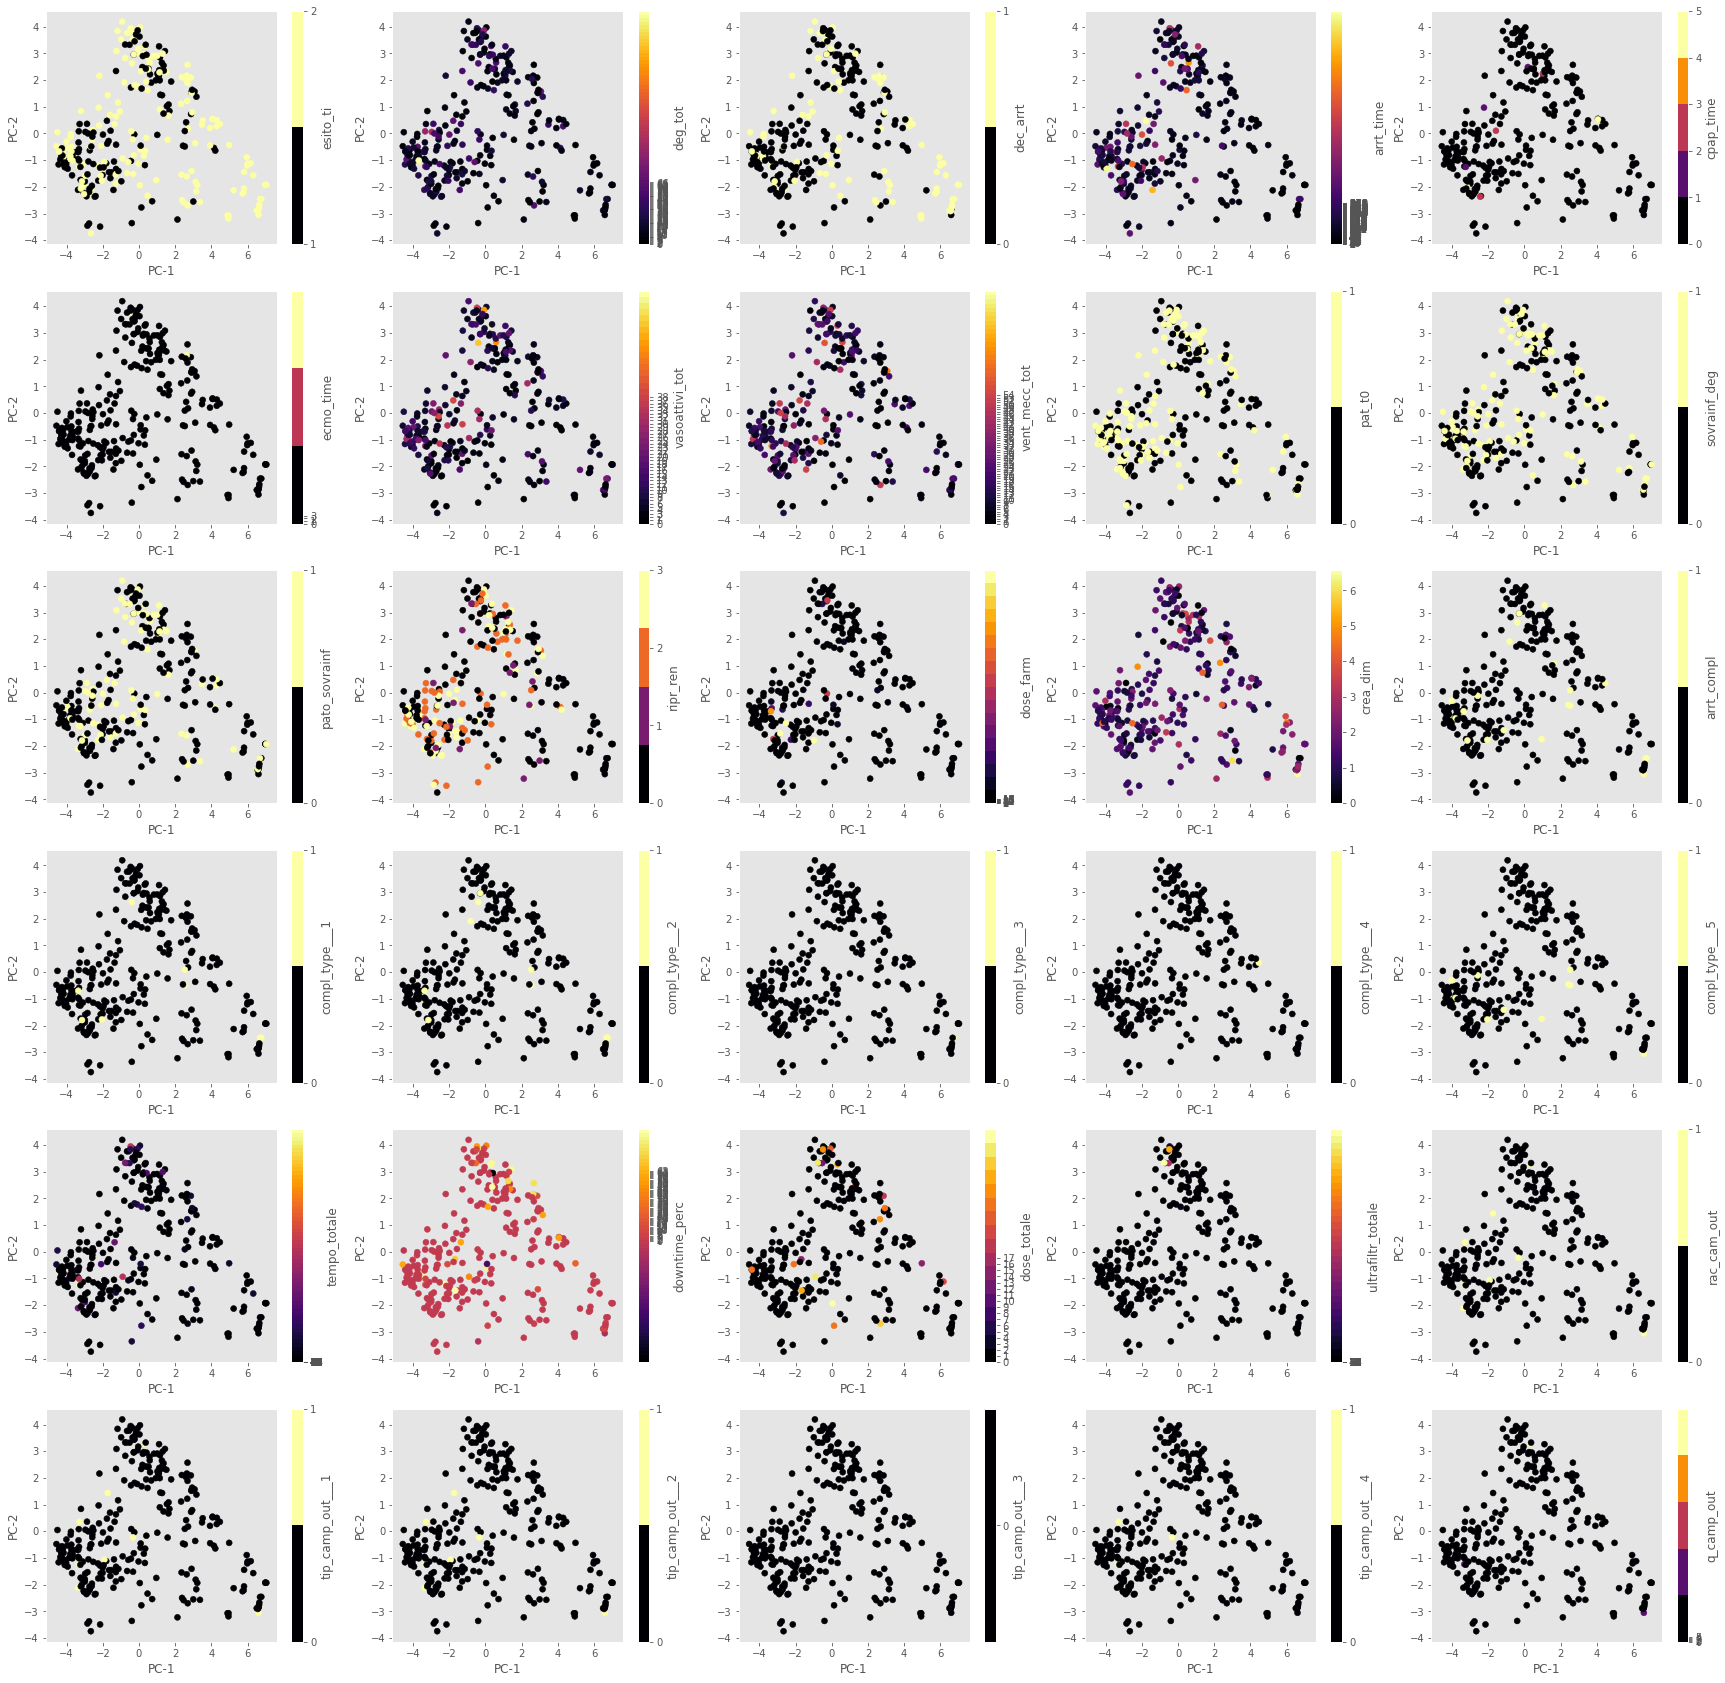

In [55]:
pca_model = PCA(n_components=2)
pca_coordinates = pca_model.fit_transform(df_3gg_minmax_scal)

fig = plt.figure(figsize=(30,30))

for i in range(0,30):
    
    ax = fig.add_subplot(6, 5, i+1)
    col = df_outcome.columns[i]
    plot2d = ax.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=df_outcome.loc[:,col], cmap=plt.cm.get_cmap('inferno',len(np.unique(df_outcome[col]))))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    fig.colorbar(plot2d , ticks=range(len(np.unique(df_outcome[col]))+1), label=col )
    
plt.rcParams['axes.grid'] = False

plt.show()

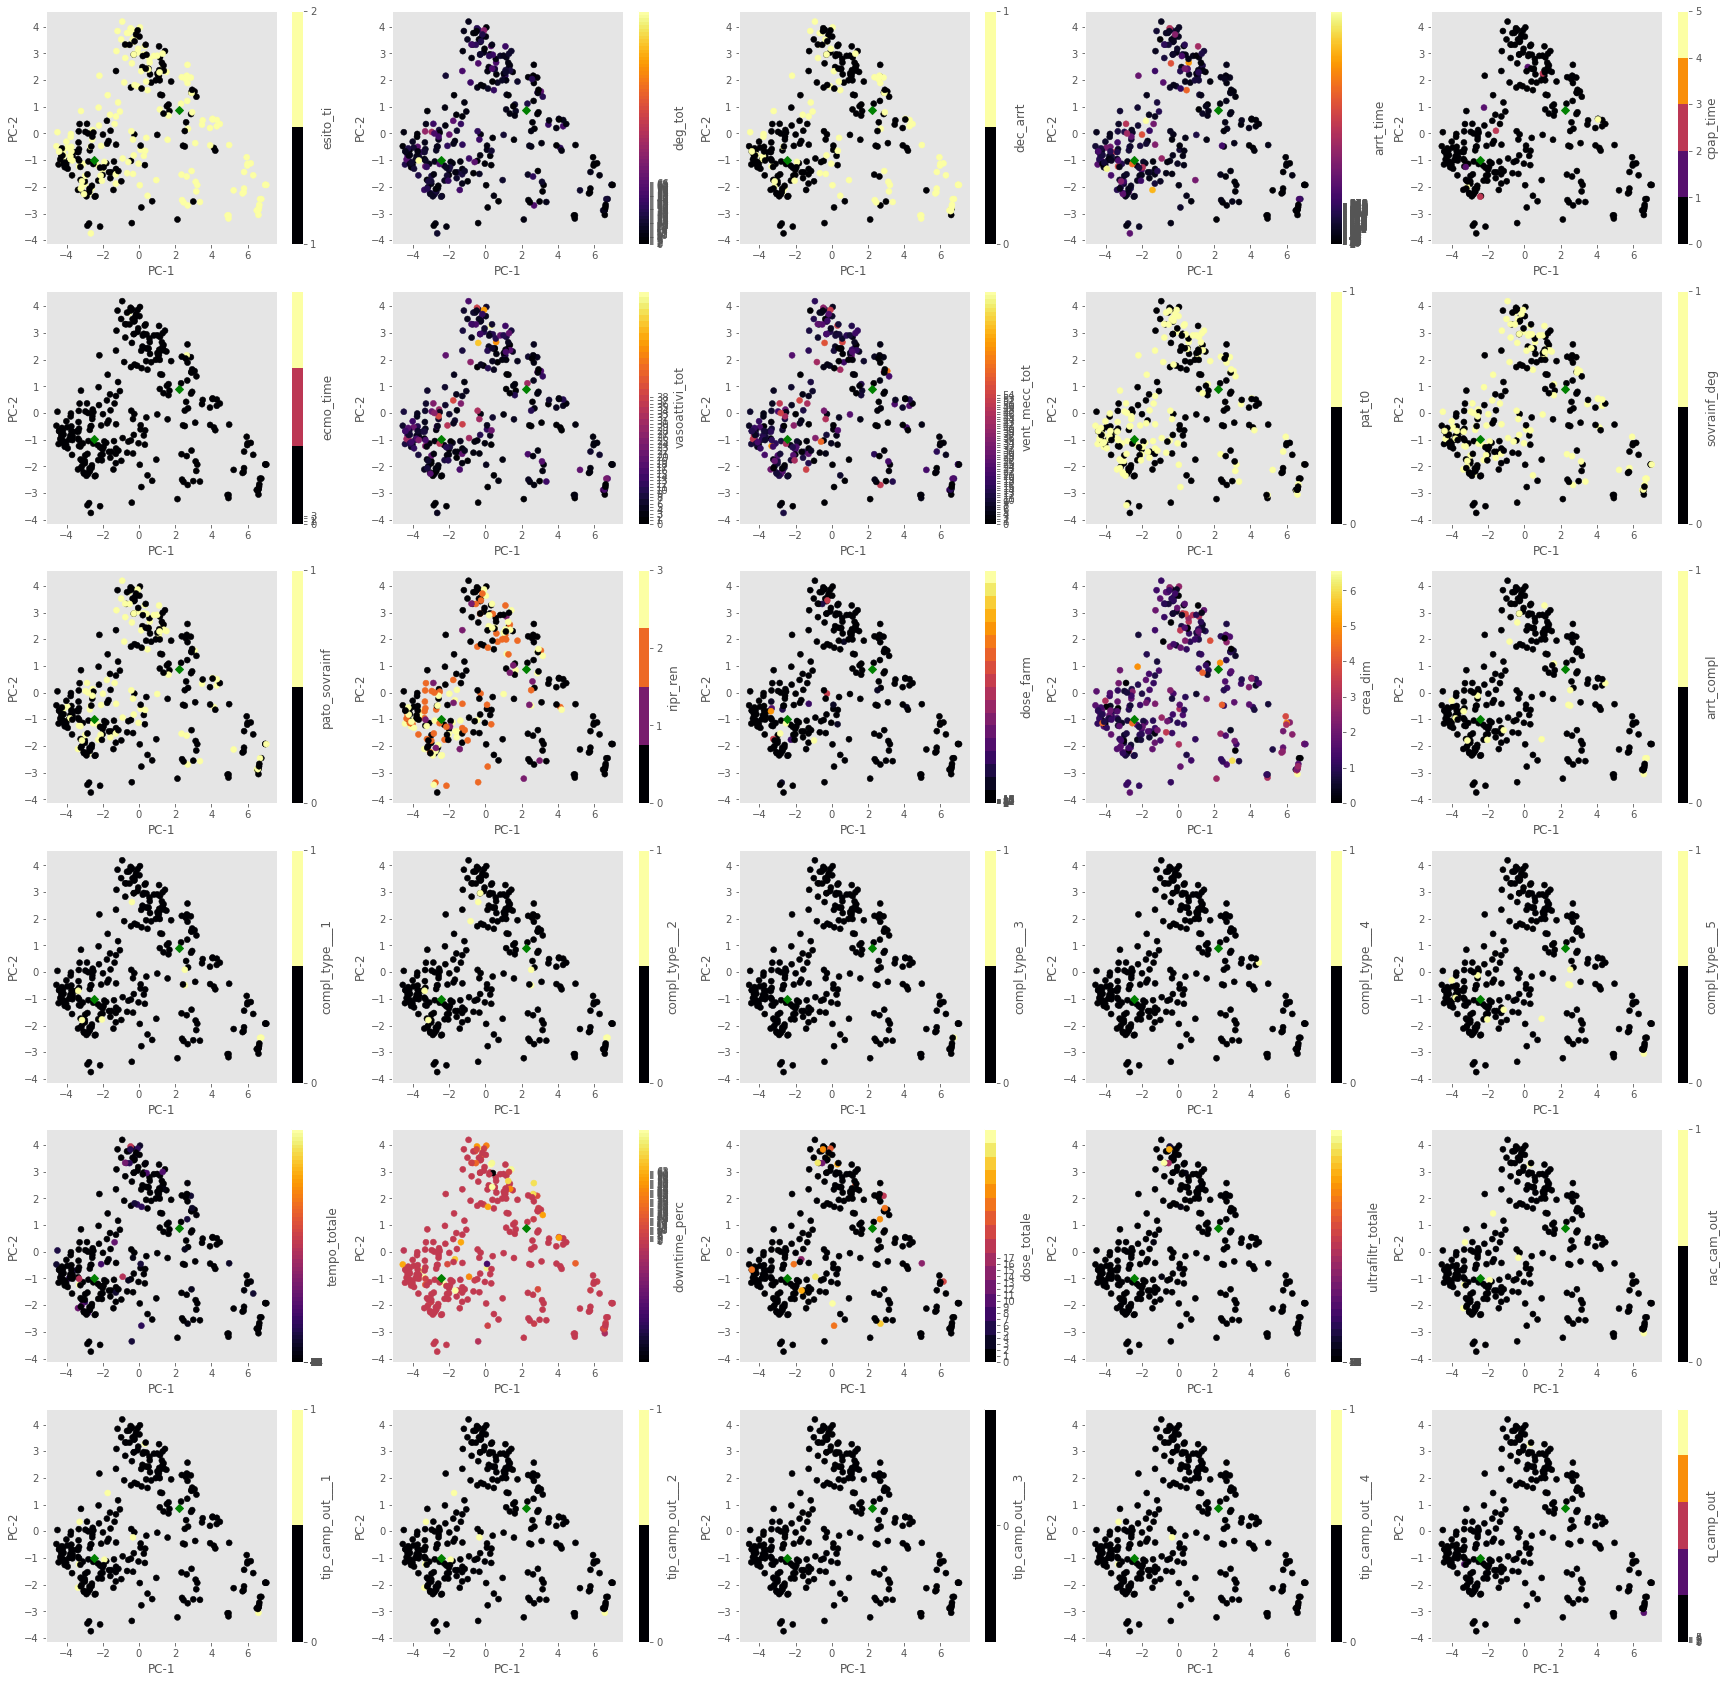

In [112]:
K=2
kmeans_model = KMeans(n_clusters=K, init='random', n_init=10)
kmeans_model.fit(df_3gg_minmax_scal)
y = kmeans_model.labels_
pca_model = PCA(n_components=2)
pca_coordinates = pca_model.fit_transform(df_3gg_minmax_scal)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)

fig = plt.figure(figsize=(30,30))

fig1 = list()
for i in range(0,30):
    ax = fig.add_subplot(6, 5, i+1)
    col = df_outcome.columns[i]
    plot2d = ax.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=df_outcome.loc[:,col], cmap=plt.cm.get_cmap('inferno',len(np.unique(df_outcome[col]))))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    fig.colorbar(plot2d , ticks=range(len(np.unique(df_outcome[col]))+1), label=col )
    
    for j in range(K):
        plt.plot(pca_centroids[j,0], pca_centroids[j,1] ,'gD') 


    
plt.rcParams['axes.grid'] = False

plt.show()

pca_centroids = pca_model1.transform(kmeans_model.cluster_centers_)


In [56]:
df1=pd.DataFrame(np.abs(pca_model.components_),columns=df_3gg.columns,index = ['PC-1','PC-2'])
df1_t =df1.transpose()
df1_t.shape
df1_t.sort_values(by='PC-1',ascending=False).iloc[:50,0].sum()
print('PC1 somma componenti' , np.sum(df1_t.iloc[:,0]))
print('PC2 somma componenti', np.sum(df1_t.iloc[:,1]))

PC1 somma componenti 17.05031633855656
PC2 somma componenti 17.180014823717173


In [57]:
X_2d = pca_model.fit(df_3gg_minmax_scal)
variance_ratio = X_2d.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
# Get the loadings (coefficients) of each principal component
loadings = X_2d.components_

In [58]:
sorted_loadings = np.argsort(np.abs(loadings[0]))[::-1]
print("Features with highest loadings in Principal Component ", 1)
for feature_idx in sorted_loadings:
    print("  ", df_3gg.columns[feature_idx], ": ", loadings[0][feature_idx])

Features with highest loadings in Principal Component  1
   ca_comp_type_crrt_foll_2gg :  -0.12212647646772544
   misura_calc_foll_2gg :  -0.11788781128050284
   tr_crrt_foll_3gg___3 :  -0.11463401864319825
   ebpt_foll_3gg :  -0.11370728814818643
   tip_arrt_foll_3gg :  -0.11370728814818643
   ph_foll_3gg :  -0.11341523484603169
   sao2_foll_3gg :  -0.11263509566981202
   ca_comp_type_crrt_foll_3gg :  -0.1109531046228732
   ca_comp_type_crrt_foll_24h :  -0.11089220311261277
   tipo_mon_emodinam_foll_3gg___1 :  -0.10907075812576159
   vent_foll_3gg :  -0.10815152501320895
   misura_calc_foll_24h :  -0.10760145799637726
   sep_foll_3gg :  -0.10752289200242489
   misura_calc_foll_3gg :  -0.10708622712210082
   tr_crrt_foll_2gg___3 :  -0.10702825471006039
   temp_foll_3gg :  -0.10700689012030042
   ebpt_foll_2gg :  -0.10533102196170774
   cit_dos_pre_crrt_foll_2gg :  -0.103040064155433
   urea_um_foll_3gg :  -0.10231739269527286
   na_foll_3gg :  -0.10192133983203028
   ca_comp_type_crrt_

In [59]:
sorted_loadings = np.argsort(np.abs(loadings[1]))[::-1]
print("Features with highest loadings in Principal Component ", 2)
for feature_idx in sorted_loadings:
    print("  ", df_3gg.columns[feature_idx], ": ", loadings[1][feature_idx])

Features with highest loadings in Principal Component  2
   ca_comp_type_0_crrt :  -0.18706125978840638
   comp_cal_crrt :  -0.16788672095250878
   misura_calc :  -0.16549873788071662
   ca_comp_type_crrt_foll_12h :  -0.15769784820050847
   cit_dos_pre_crrt_foll_12h :  -0.14522171059784542
   misura_calc_foll_12h :  -0.1434046055963366
   ca_comp_type_crrt_foll_24h :  -0.14090269516507728
   cit_dos_pre_crrt :  -0.1401897136725158
   misura_calc_foll_24h :  -0.13251583397442931
   ca_tot_crrt_foll_12h :  -0.12651628677127277
   vasoatt_quali_foll_24h___2 :  0.12286977897774637
   vasoattivi_foll_24h :  0.12042270687024713
   comp_cal_crrt_foll_12h :  -0.12028951950091049
   cit_dos_pre_crrt_foll_24h :  -0.119829438333122
   misura_calc_foll_2gg :  -0.11517981833977893
   ca_ione_crrt_foll_24h :  -0.11509973980879827
   ca_comp_type_crrt_foll_2gg :  -0.11272796567246682
   qpbp_crrt :  -0.10979292559811071
   hypotension_sofa_foll_24h :  0.10906810489077719
   vasoattivi_foll_2gg :  0.1

## Analizzo il PCA su 3 componenti 
Considero il PCA su 3 componenti per i 3 giorni, per vedere che valore hanno le feature sulla  

FARE ANALISI DELLE FEATURE RISPETTO AL PCA

In [60]:
df=pd.DataFrame(np.abs(pca11.components_),columns=df_3gg.columns,index = ['PC-1','PC-2','PC-3'])

In [61]:
df_t =df.transpose()

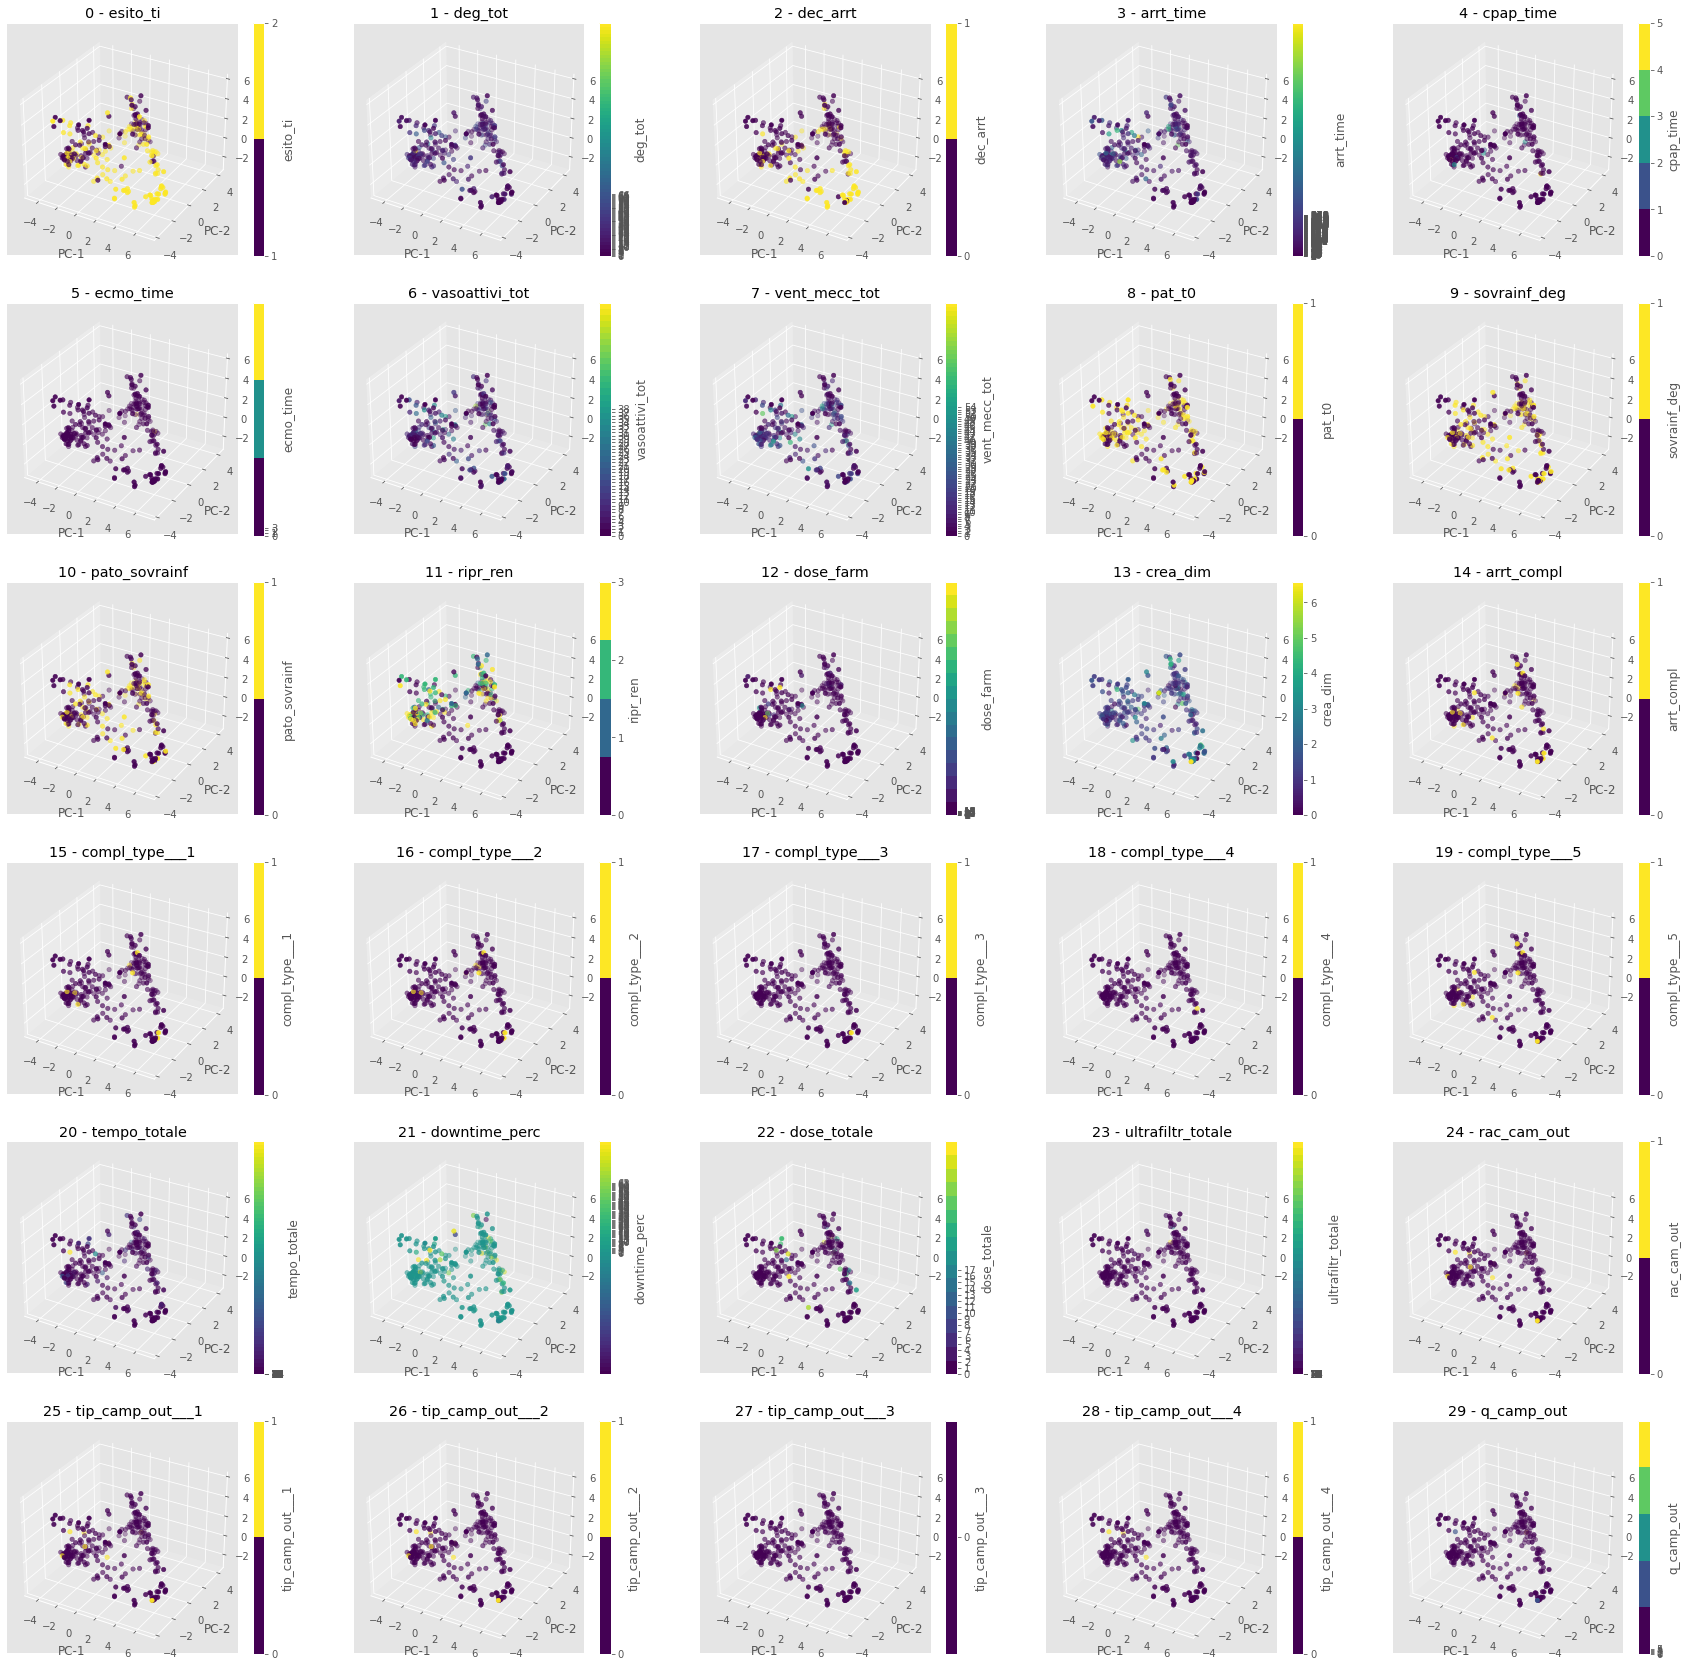

In [62]:
pca_model1 = PCA(n_components=3)
pca_coordinates1 = pca_model1.fit_transform(df_3gg_minmax_scal)

fig = plt.figure(figsize=(30,30))

fig1 = list()
for i in range(0,30):
    ax = fig.add_subplot(6, 5, i+1, projection='3d')
    col = df_outcome.columns[i]

    plot3d = ax.scatter(pca_coordinates1[:, 0], pca_coordinates1[:, 1],pca_coordinates1[:, 2],  c=df[col],\
               cmap=plt.cm.get_cmap('viridis',len(np.unique(df_outcome[col]))))
    
    fig.colorbar(plot3d ,ticks=range(len(np.unique(df_outcome[col]))+1), label=col)
    plt.title(str(i) + " - " + str(col))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    fig1.append(px.scatter_3d(
        pca_coordinates1, x=0, y=1, z=2, color=df_outcome[col],
        color_continuous_scale='viridis',title=str(col) + "-3gg",
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        height=700
    )
    )
    
plt.rcParams['axes.grid'] = False

plt.show()

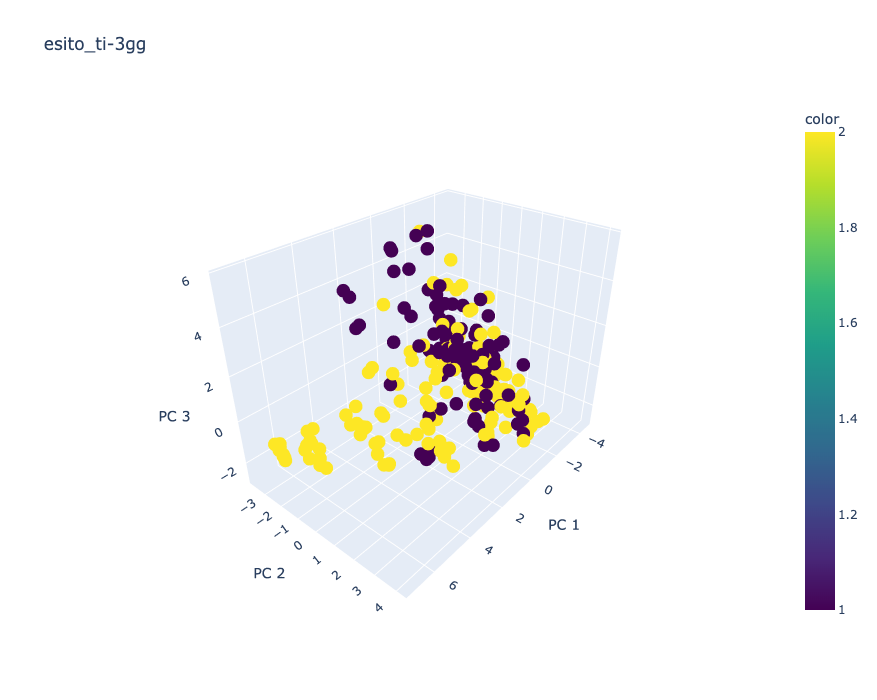

In [87]:
fig1[0].show()

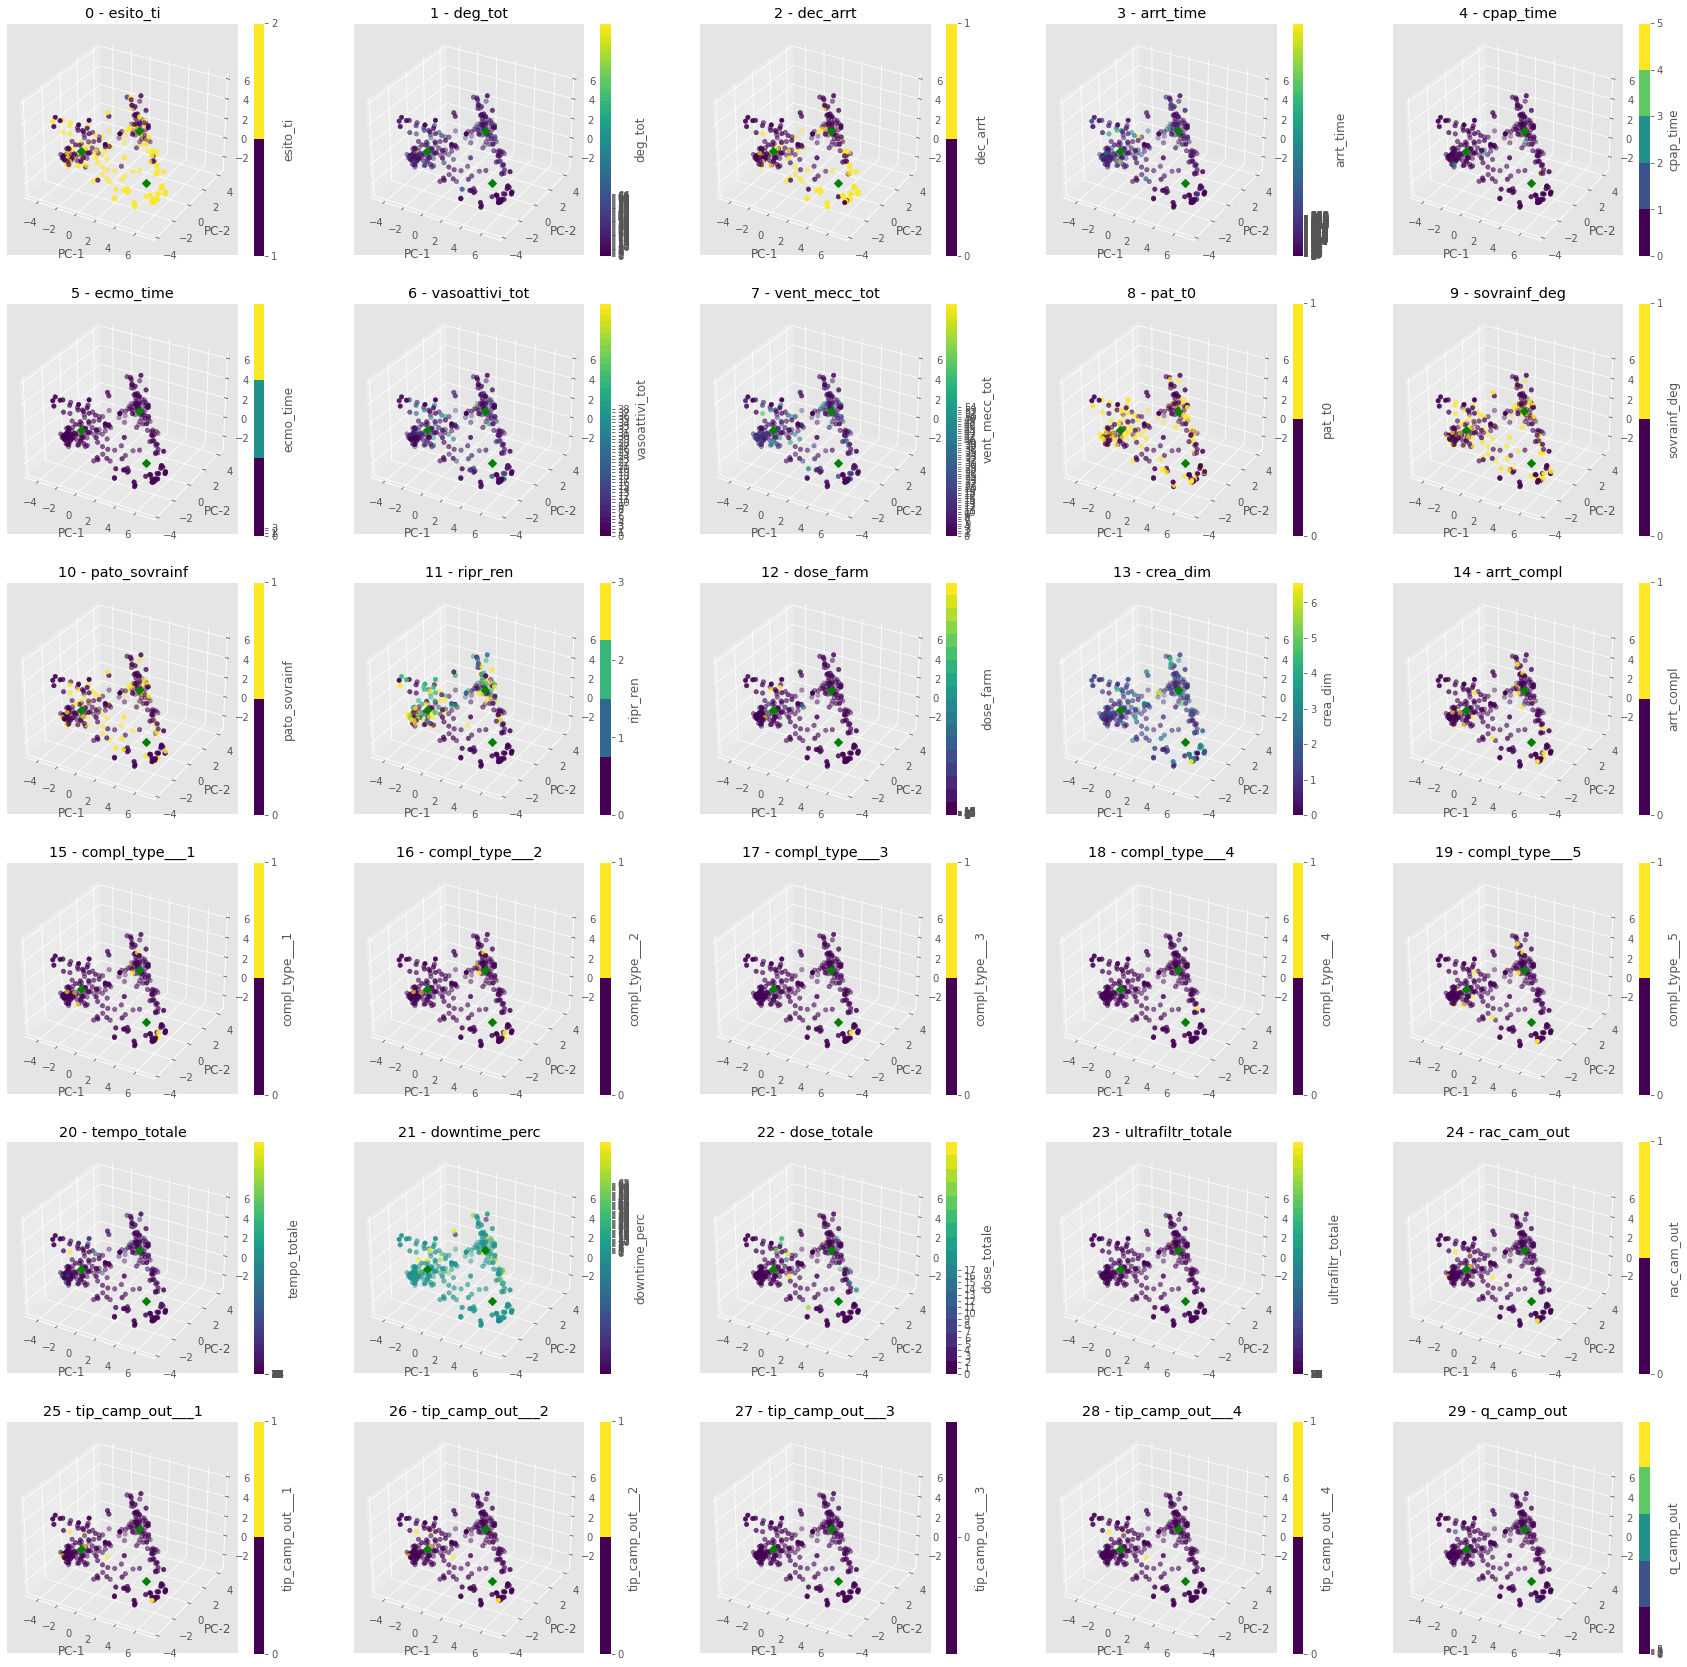

In [108]:
K=3
kmeans_model = KMeans(n_clusters=K, init='random', n_init=10)
kmeans_model.fit(df_3gg_minmax_scal)
y = kmeans_model.labels_
pca_model1 = PCA(n_components=3)
pca_coordinates1 = pca_model1.fit_transform(df_3gg_minmax_scal)
pca_centroids = pca_model1.transform(kmeans_model.cluster_centers_)

fig = plt.figure(figsize=(30,30))

fig1 = list()
for i in range(0,30):
    ax = fig.add_subplot(6, 5, i+1, projection='3d')
    col = df_outcome.columns[i]

    plot3d = ax.scatter(pca_coordinates1[:, 0], pca_coordinates1[:, 1],pca_coordinates1[:, 2],  c=df_outcome[col],\
               cmap=plt.cm.get_cmap('viridis',len(np.unique(df_outcome[col]))))
    
    for j in range(K):
        plt.plot(pca_centroids[j,0], pca_centroids[j,1] , pca_centroids[j,2] ,'gD') 

    fig.colorbar(plot3d ,ticks=range(len(np.unique(df_outcome[col]))+1), label=col)
    plt.title(str(i) + " - " + str(col))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    
plt.rcParams['axes.grid'] = False

plt.show()

pca_centroids = pca_model1.transform(kmeans_model.cluster_centers_)


In [84]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1], dtype=int32)

In [64]:
X_3d = pca_model1.fit(df_3gg_minmax_scal)
variance_ratio = X_3d.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
# Get the loadings (coefficients) of each principal component
loadings1 = X_3d.components_

sorted_loadings1 = np.argsort(np.abs(loadings1[0]))[::-1]
print("Features with highest loadings in Principal Component ", 1)
for feature_idx in sorted_loadings1:
    print("  ", df_3gg.columns[feature_idx], ": ", loadings1[0][feature_idx])

In [117]:
sorted_loadings1 = np.argsort(np.abs(loadings1[1]))[::-1]
print("Features with highest loadings in Principal Component ", 2)
for feature_idx in sorted_loadings1:
    print("  ", df_3gg.columns[feature_idx], ": ", loadings1[1][feature_idx])

Features with highest loadings in Principal Component  2
   ca_comp_type_0_crrt :  -0.18706204997461176
   comp_cal_crrt :  -0.1678874371826826
   misura_calc :  -0.16549930527737414
   ca_comp_type_crrt_foll_12h :  -0.15769840917810027
   cit_dos_pre_crrt_foll_12h :  -0.14522213852137586
   misura_calc_foll_12h :  -0.1434051264207155
   ca_comp_type_crrt_foll_24h :  -0.14090333855501355
   cit_dos_pre_crrt :  -0.1401902283561723
   misura_calc_foll_24h :  -0.13251638905422963
   ca_tot_crrt_foll_12h :  -0.12651660940516968
   vasoatt_quali_foll_24h___2 :  0.12286959459340378
   vasoattivi_foll_24h :  0.12042250925852825
   comp_cal_crrt_foll_12h :  -0.12028994474077973
   cit_dos_pre_crrt_foll_24h :  -0.11983007852560883
   misura_calc_foll_2gg :  -0.11517986220414149
   ca_ione_crrt_foll_24h :  -0.11510031781763327
   ca_comp_type_crrt_foll_2gg :  -0.11272798165974827
   qpbp_crrt :  -0.10979322173661918
   hypotension_sofa_foll_24h :  0.1090678420081754
   vasoattivi_foll_2gg :  0.1

In [118]:
sorted_loadings1 = np.argsort(np.abs(loadings1[2]))[::-1]
print("Features with highest loadings in Principal Component ", 3)
for feature_idx in sorted_loadings1:
    print("  ", df_3gg.columns[feature_idx], ": ", loadings1[2][feature_idx])

Features with highest loadings in Principal Component  3
   moto_gcs :  0.1711744337071431
   saps_gcs :  -0.1645425537627472
   moto_gcs_foll_2gg :  0.1614086675729906
   moto_gcs_foll_3gg :  0.15641280879743283
   gcs :  0.15613820295726843
   moto_gcs_foll_24h :  0.15253887161018378
   occhi_gcs :  0.14980474843664326
   gcs_foll_2gg :  0.1461593617106636
   gcs_sofa :  -0.14375955728838485
   moto_gcs_foll_12h :  0.14293987631408717
   verb_gcs :  0.14209300541039419
   gcs_foll_3gg :  0.14159995125335895
   verb_gcs_foll_2gg :  0.13678390278884733
   occhi_gcs_foll_2gg :  0.13500472656944357
   gcs_foll_24h :  0.1327945028319109
   occhi_gcs_foll_3gg :  0.13204331492731614
   vent :  -0.1302945691746592
   gcs_foll_12h :  0.13028770077381585
   verb_gcs_foll_3gg :  0.1302404616912221
   gcs_sofa_foll_12h :  -0.12599835629240808
   verb_gcs_foll_24h :  0.12388481231711301
   occhi_gcs_foll_24h :  0.12347207685163272
   occhi_gcs_foll_12h :  0.12241904625551268
   verb_gcs_foll_12h 

# Caso 2

Ossia valuto il PCA sempre senza outcome ma anche senza score e valuto i pca rispetto gli score


In [68]:
df_tempo0 = df_noscore.loc[:,:'prescrizione_trattamento_complete']
df_1gg_1 = df_noscore.loc[:,:'diff_sofa_score_foll_24h']
df_2gg_2 = df_noscore.loc[:,:'diff_sofa_score_foll_2gg']
df_3gg_2 = df_noscore.copy()

#### Tempo 0

In [69]:
minmax_scaler.fit(df_tempo0)
df_noscore1_minmax_scal = minmax_scaler.transform(df_tempo0)

In [70]:
df_score_tempo0 = df_score.loc[:,:'saps_totale']

[0.10076562 0.09116376]
0.19192937646703084


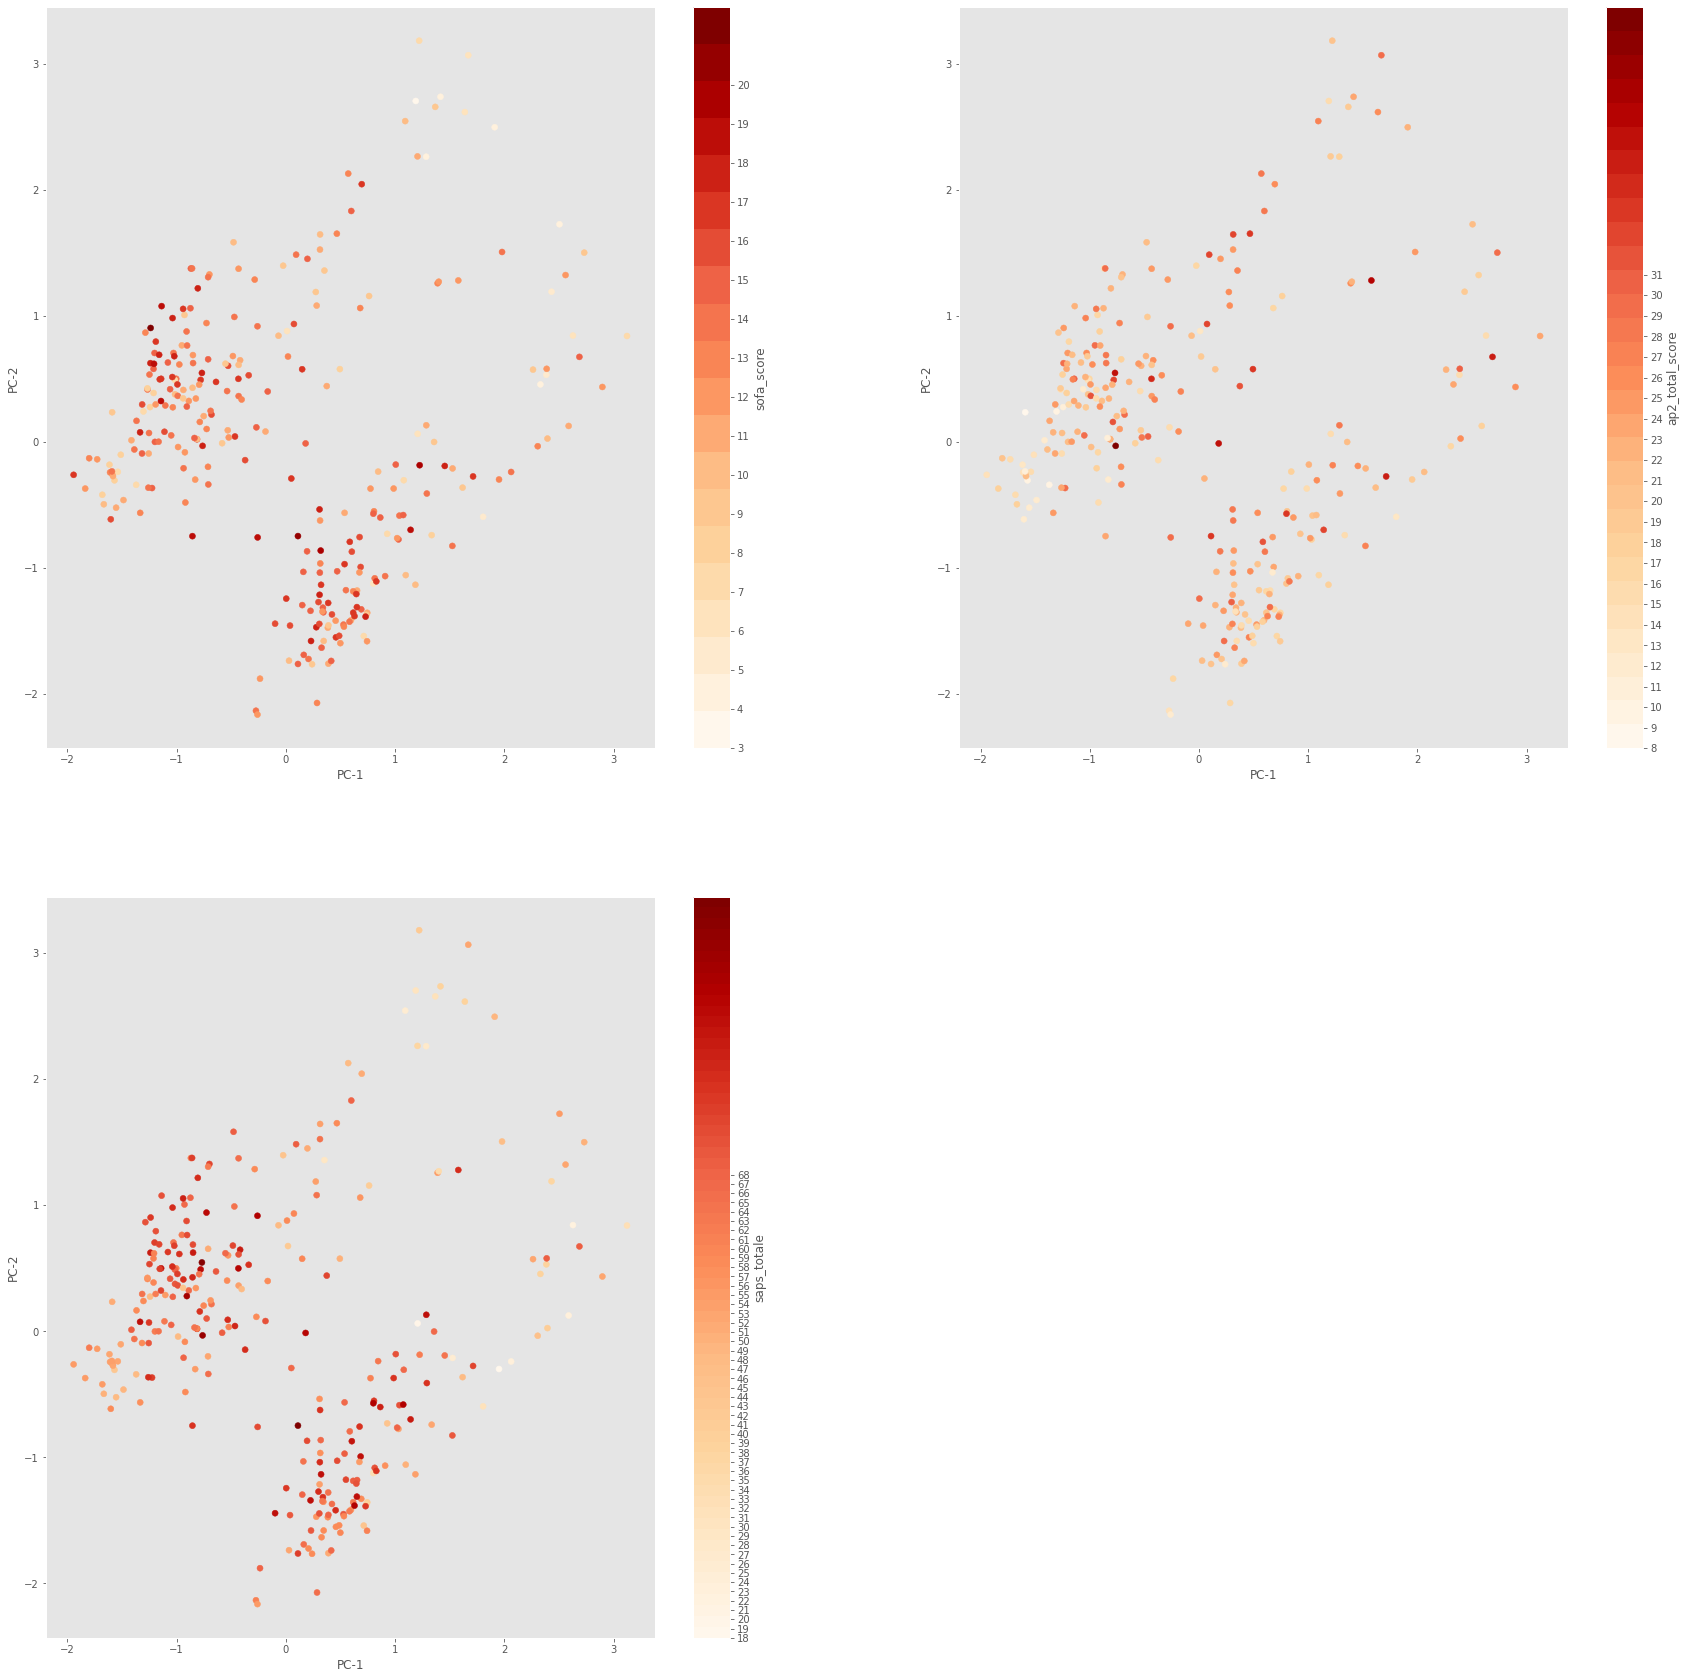

In [71]:
pca_model__1 = PCA(n_components=2)
pca_coordinates = pca_model__1.fit_transform(df_noscore1_minmax_scal)

fig = plt.figure(figsize=(30,30))

for i in range(0,3):
    
    ax = fig.add_subplot(2, 2, i+1)
    col = df_score_tempo0.columns[i]
    plot2d = ax.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=df_score.loc[:,col], cmap=plt.cm.get_cmap('OrRd',len(np.unique(df_score_tempo0[col]))))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    fig.colorbar(plot2d , ticks=range(len(np.unique(df_score_tempo0[col]))+1), label=col )
    
plt.rcParams['axes.grid'] = False
print(pca_model__1.explained_variance_ratio_)
print(np.sum(pca_model__1.explained_variance_ratio_))
plt.show()

[0.10076562 0.09116376 0.07543433]
0.2673637083168503


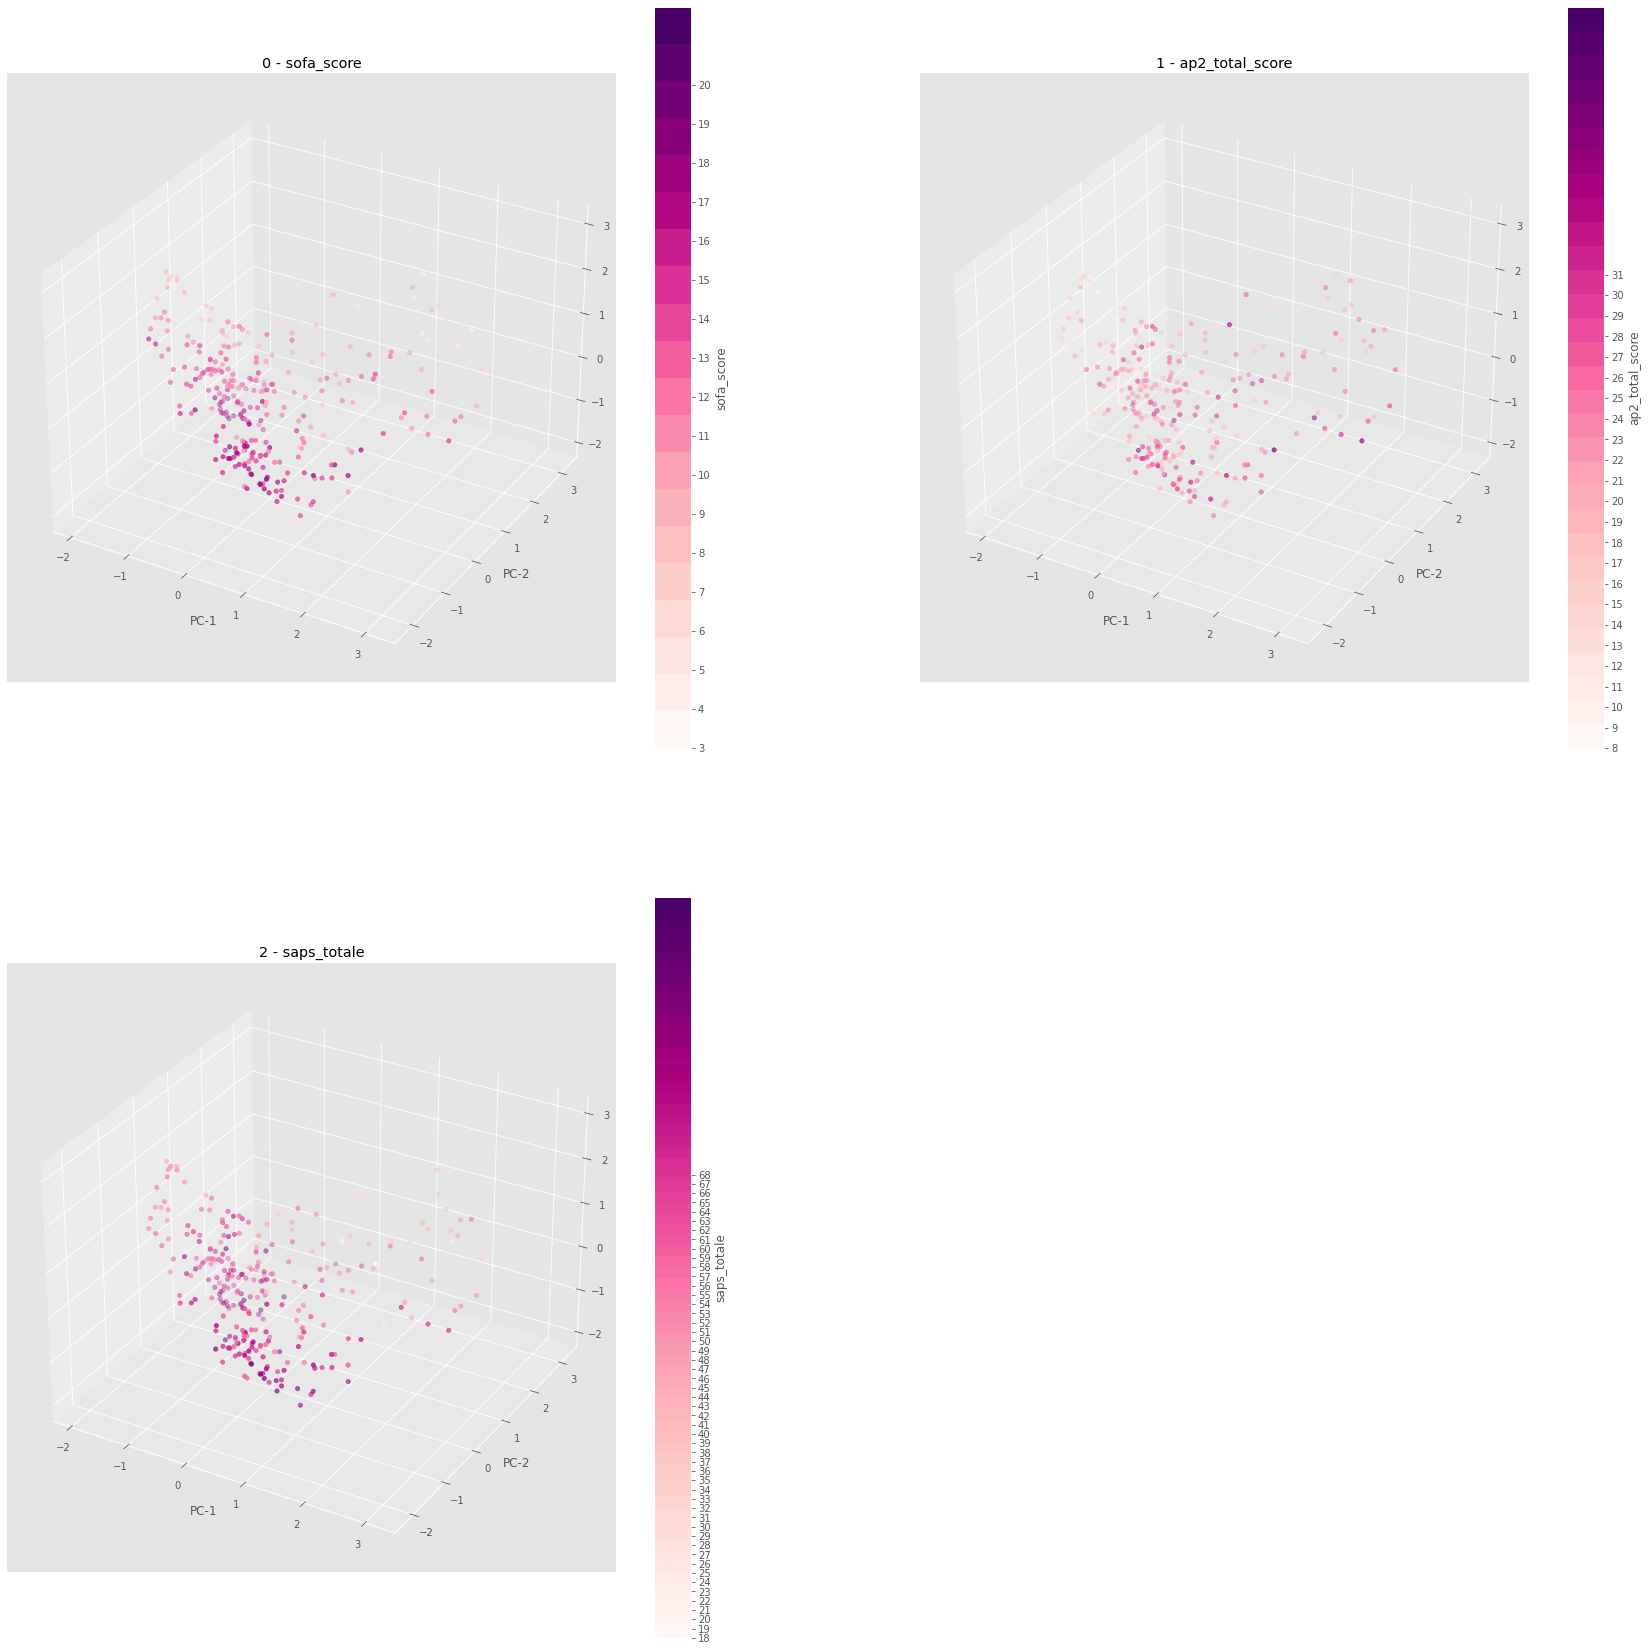

In [115]:
pca_model1__1 = PCA(n_components=3)
pca_coordinates1 = pca_model1__1.fit_transform(df_noscore1_minmax_scal)

fig = plt.figure(figsize=(30,30))

fig2 = list()
for i in range(0,3):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    col = df_score_tempo0.columns[i]

    plot3d = ax.scatter(pca_coordinates1[:, 0], pca_coordinates1[:, 1],pca_coordinates1[:, 2],  c=df_tempo0[sep],\
               cmap=plt.cm.get_cmap('RdPu',len(np.unique(df_score_tempo0[col]))))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    fig.colorbar(plot3d ,ticks=range(len(np.unique(df_score_tempo0[col]))+1), label=col)
    plt.title(str(i) + " - " + str(col))
    
    fig2.append(px.scatter_3d(
        pca_coordinates1, x=0, y=1, z=2, color=df_score_tempo0[col],
        color_continuous_scale='magenta',title=str(col),
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        height=700
    )
    )
    
plt.rcParams['axes.grid'] = False
print(pca_model1__1.explained_variance_ratio_)
print(np.sum(pca_model1__1.explained_variance_ratio_))
plt.show()

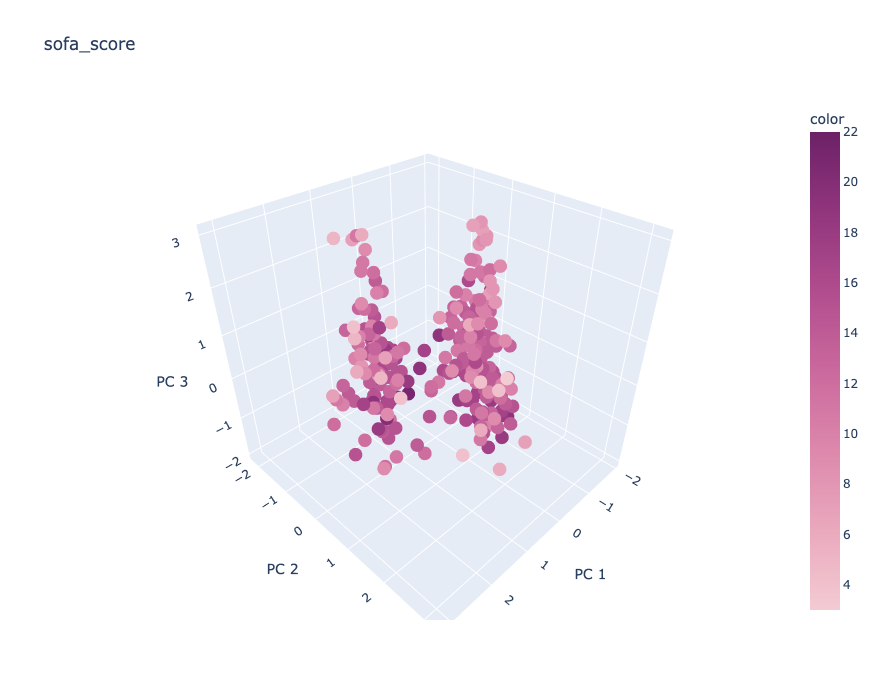

In [116]:
fig2[0].show()

#### 1 Giorno

In [74]:
minmax_scaler.fit(df_1gg_1)
df_noscore2_minmax_scal = minmax_scaler.transform(df_1gg_1)

[0.14272174 0.08744444]
0.2301661802329118


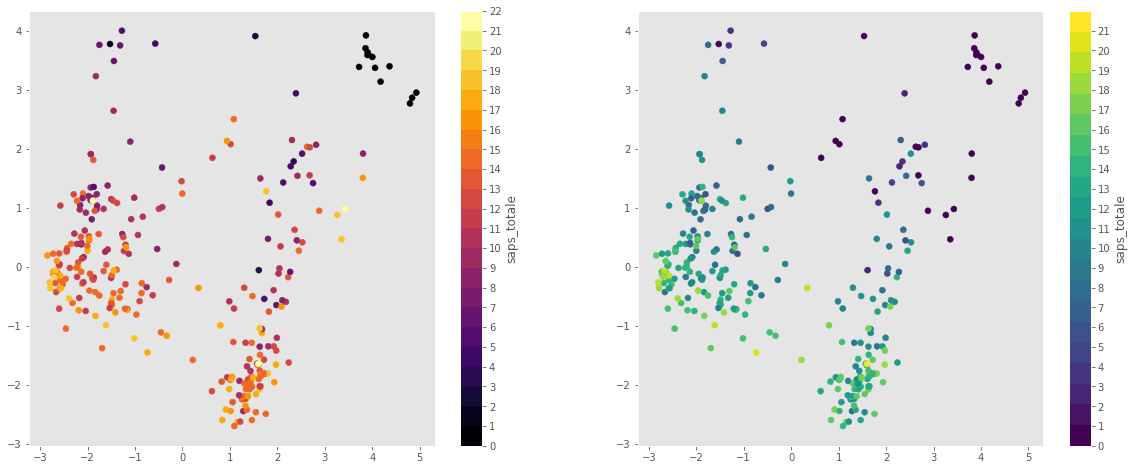

In [75]:
pca_model__2 = PCA(n_components=2)
pca_coordinates = pca_model__2.fit_transform(df_noscore2_minmax_scal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
plot2d_1 = ax1.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=df_score['sofa_score_foll_12h'], cmap=plt.cm.get_cmap('inferno',len(np.unique(df_score['sofa_score_foll_12h']))))
fig.colorbar(plot2d_1,ticks=range(len(np.unique(df_score['sofa_score_foll_12h']))+1), label=col, ax=ax1 )
plot2d_2 = ax2.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=df_score['sofa_score_foll_24h'], cmap=plt.cm.get_cmap('viridis',len(np.unique(df_score['sofa_score_foll_24h']))))
fig.colorbar(plot2d_2 , ticks=range(len(np.unique(df_score['sofa_score_foll_24h']))+1), label=col,ax=ax2 )

plt.rcParams['axes.grid'] = False
print(pca_model__2.explained_variance_ratio_)
print(np.sum(pca_model__2.explained_variance_ratio_))
plt.show()

[0.14272174 0.08744444 0.0713666 ]
0.301532781382821


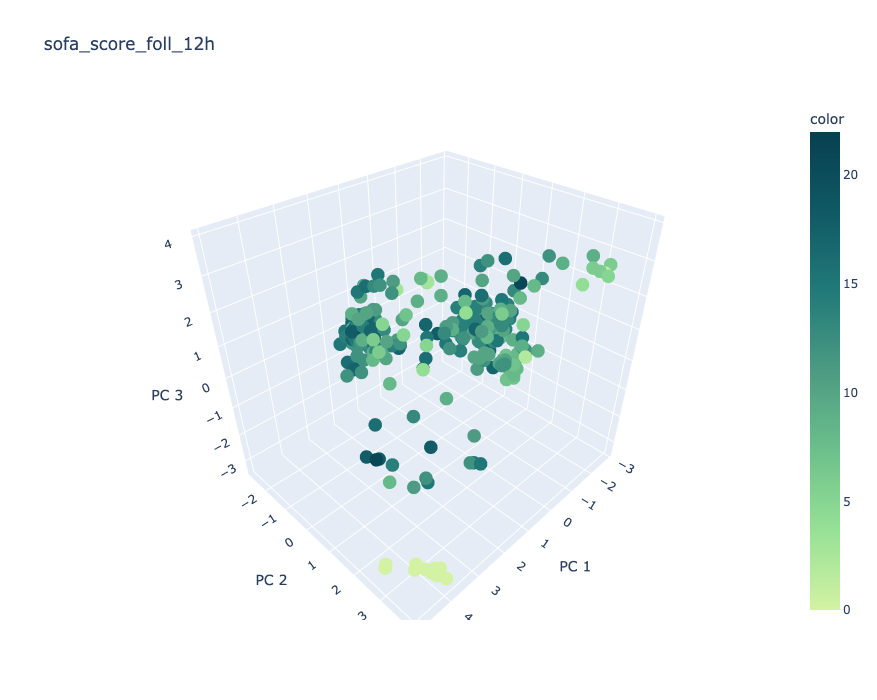

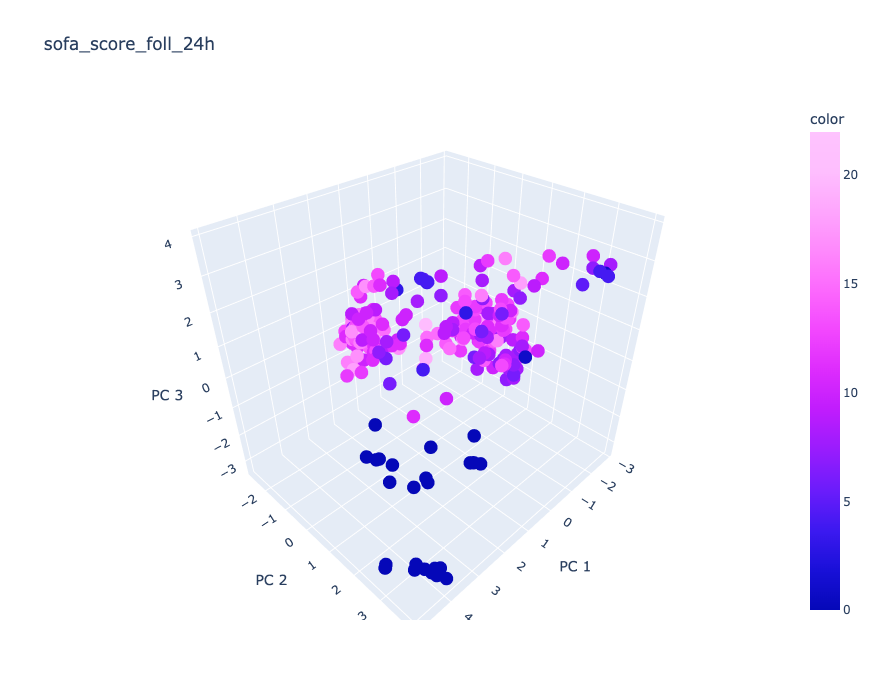

In [76]:
pca_model1__2 = PCA(n_components=3)
pca_coordinates1 = pca_model1__2.fit_transform(df_noscore2_minmax_scal)

print(pca_model1__2.explained_variance_ratio_)
print(np.sum(pca_model1__2.explained_variance_ratio_))


px.scatter_3d(
        pca_coordinates1, x=0, y=1, z=2, color=df_score['sofa_score_foll_12h'],
        color_continuous_scale='emrld',title='sofa_score_foll_12h',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        height=700
    ).show()
px.scatter_3d(
        pca_coordinates1, x=0, y=1, z=2, color=df_score['sofa_score_foll_24h'],
        color_continuous_scale='plotly3',title='sofa_score_foll_24h',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        height=700
    ).show()




#### 2 Giorni

In [77]:
minmax_scaler.fit(df_2gg_2)
df_noscore3_minmax_scal = minmax_scaler.transform(df_2gg_2)

[0.16028896 0.08703067]
0.24731963529783363


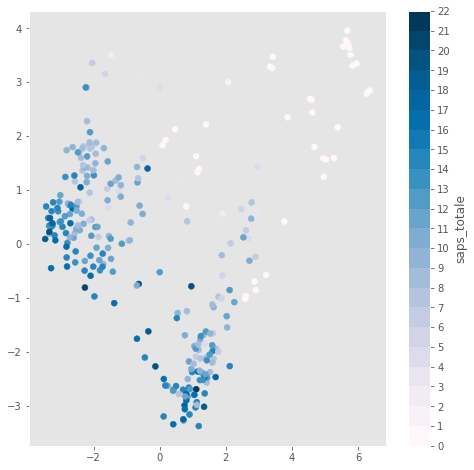

In [78]:
pca_model = PCA(n_components=2)
pca_coordinates = pca_model.fit_transform(df_noscore3_minmax_scal)

fig = plt.figure(figsize=(8,8))

plot2d = plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=df_score['sofa_score_foll_2gg'], cmap=plt.cm.get_cmap('PuBu',len(np.unique(df_score['sofa_score_foll_2gg']))))
fig.colorbar(plot2d,ticks=range(len(np.unique(df_score['sofa_score_foll_2gg']))+1), label=col)

print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_))
plt.show()

[0.16028896 0.08703067 0.06829259]
0.31561222076071366


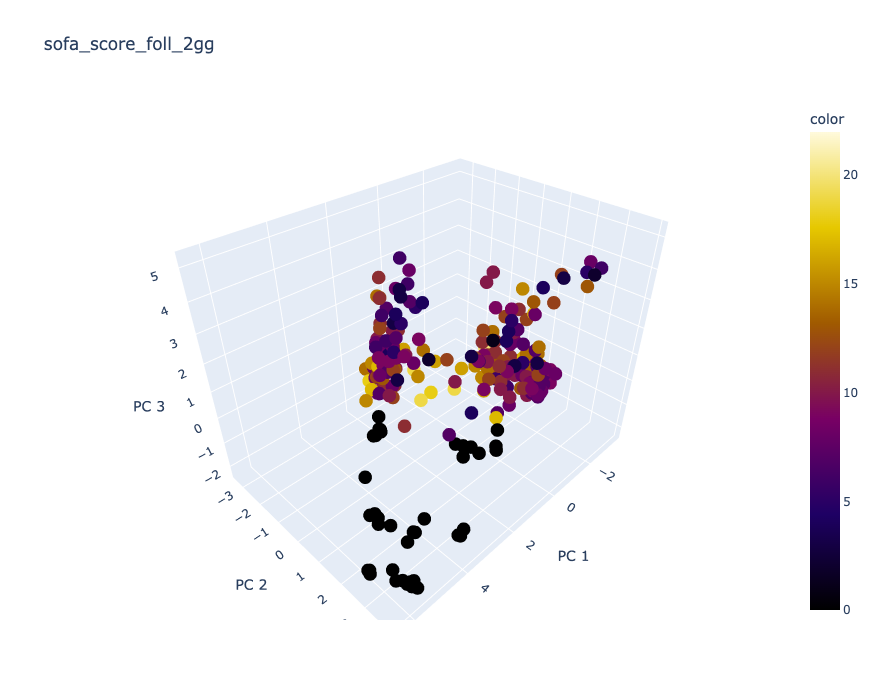

In [79]:
pca_model1 = PCA(n_components=3)
pca_coordinates1 = pca_model1.fit_transform(df_noscore3_minmax_scal)

print(pca_model1.explained_variance_ratio_)
print(np.sum(pca_model1.explained_variance_ratio_))


px.scatter_3d(
        pca_coordinates1, x=0, y=1, z=2, color=df_score['sofa_score_foll_2gg'],
        color_continuous_scale='electric',title='sofa_score_foll_2gg',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        height=700
    ).show()





#### Totale

In [80]:
minmax_scaler.fit(df_3gg_2)
df_noscore4_minmax_scal = minmax_scaler.transform(df_3gg_2)

[0.18459183 0.07919391]
0.26378573759955526


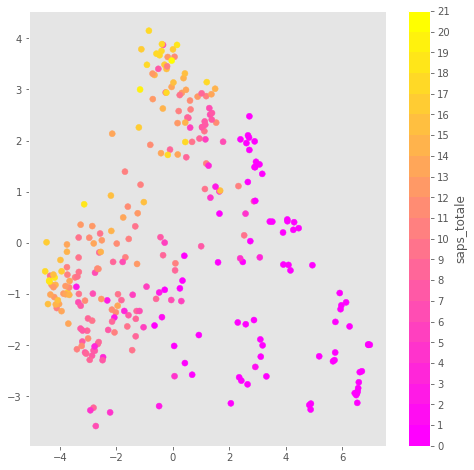

In [81]:
pca_model__3 = PCA(n_components=2)
pca_coordinates = pca_model__3.fit_transform(df_noscore4_minmax_scal)

print(pca_model__3.explained_variance_ratio_)
print(np.sum(pca_model__3.explained_variance_ratio_))

fig = plt.figure(figsize=(8,8))

plot2d = plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=df_score['sofa_score_foll_3gg'], cmap=plt.cm.get_cmap('spring',len(np.unique(df_score['sofa_score_foll_3gg']))))
fig.colorbar(plot2d,ticks=range(len(np.unique(df_score['sofa_score_foll_3gg']))+1), label=col)


plt.show()

[0.18459183 0.07919391 0.06221836]
0.3260040990267658


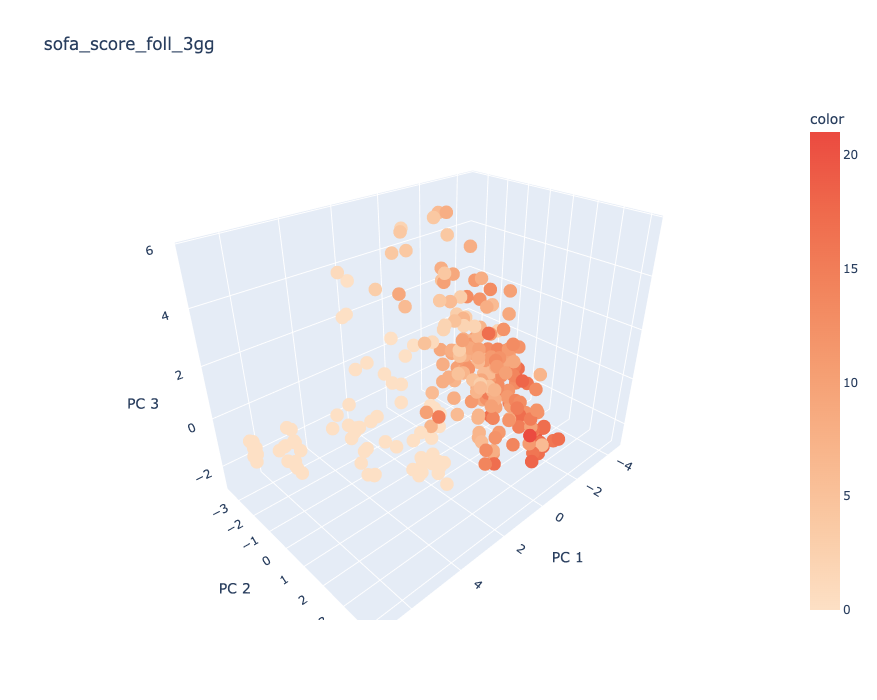

In [82]:
pca_model1__3 = PCA(n_components=3)
pca_coordinates1 = pca_model1__3.fit_transform(df_noscore4_minmax_scal)

print(pca_model1__3.explained_variance_ratio_)
print(np.sum(pca_model1__3.explained_variance_ratio_))


px.scatter_3d(
        pca_coordinates1, x=0, y=1, z=2, color=df_score['sofa_score_foll_3gg'],
        color_continuous_scale='peach',title='sofa_score_foll_3gg',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        height=700
    ).show()



